## Telecom Churn Case Study

**Problem Statement:**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### 1. Importing Libraries and Dataset

In [1]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline
pd.set_option('display.max_rows', 500)

In [3]:
# Import data from .csv file

telcom_data = pd.read_csv('telecom_churn_data.csv')
telcom_data

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,77.811,79.081,140.835,29.26,18.13,16.06,49.49,100.83,69.01,66.39,56.13,0.0,0.00,0.00,0.95,0.0,0.00,0.00,4.23,28.93,18.13,16.06,49.49,91.34,47.53,57.51,46.71,1.71,9.81,5.83,...,0.00,0.0

### 2. Date Understanding

In [4]:
# Shape of dataframe

telcom_data.shape

(99999, 226)

In [5]:
# Info of dateset

telcom_data.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
# Descriptive statistics of dataframe

telcom_data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,...,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.001207e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,...,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092

### 3. Data Cleaning

``mobile_number`` and ``circle_id`` are id columns. Hence, we can drop them.

In [7]:
# Drop id columns

id_cols = ['mobile_number', 'circle_id']

telcom_data.drop(columns=id_cols, inplace=True)

As we are not doing any time series analysis, the data columns in our dataset are not useful, hence we can drop ``last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9, date_of_last_rech_6, date_of_last_rech_7, date_of_last_rech_8, date_of_last_rech_9, date_of_last_rech_data_6, date_of_last_rech_data_7, date_of_last_rech_data_8`` and ``date_of_last_rech_data_9`` columns.

In [8]:
# dropping date columns

date_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 
             'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 
             'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
telcom_data.drop(columns=date_cols, inplace=True)

In [9]:
# Shape of dataframe after deleting date columns

telcom_data.shape

(99999, 212)

``loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8`` and ``std_ic_t2o_mou_9`` are the variables where we have only 1 level i.e 0 for entire column. We can drop such columns as we don't have any variance.

In [10]:
# Null value percentage for columns with 1 level

single_level_cols = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 
                     'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']

telcom_data[single_level_cols].isnull().sum()/telcom_data.shape[0]*100

loc_og_t2o_mou      1.018010
std_og_t2o_mou      1.018010
loc_ic_t2o_mou      1.018010
std_og_t2c_mou_6    3.937039
std_og_t2c_mou_7    3.859039
std_og_t2c_mou_8    5.378054
std_og_t2c_mou_9    7.745077
std_ic_t2o_mou_6    3.937039
std_ic_t2o_mou_7    3.859039
std_ic_t2o_mou_8    5.378054
std_ic_t2o_mou_9    7.745077
dtype: float64

In [11]:
# Dropping columns with single level as they don't have any variance

telcom_data.drop(columns=single_level_cols, inplace=True)

In [12]:
# Shape after deleting single level columns

telcom_data.shape

(99999, 201)

``night_pck_user_6, night_pck_user_7, night_pck_user_8, night_pck_user_9, fb_user_6, fb_user_7, fb_user_8`` and ``fb_user_9`` columns are skewed Categorical variables and they have high percentage of null values. Even if we impute them then these columns will be very highly skewed columns, hence it is better to drop them.

In [13]:
# Dropping skewed columns

skewed_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

telcom_data.drop(columns=skewed_cols, inplace=True)

In [14]:
# Shape after deleting skewed columns

telcom_data.shape

(99999, 193)

``monthly_2g_6, monthly_2g_7, monthly_2g_8, monthly_2g_9, monthly_3g_6, monthly_3g_7, monthly_3g_8`` and ``monthly_3g_9``are the **Categorical Variables** where we have multiples classes.

Rest of the variables can be categorised as **Continuous Variables**. 

In [15]:
# Creating list of Categorical and Continuous variables

cat_cols = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9']

cont_cols = [i for i in telcom_data.columns if i not in cat_cols]

In [16]:
# Verify cat_cols and cont_cols

print(len(cat_cols))

print(len(cont_cols))

8
185


In [17]:
# Columns wise null value percentages
def calculate_null_value_percentages():
    col_nulls = pd.DataFrame((telcom_data.isnull().sum()/telcom_data.shape[0])*100)
    col_nulls.reset_index(inplace=True)
    col_nulls.columns = ['Column_Name', 'Null_Value_%age']
    return col_nulls[col_nulls['Null_Value_%age']>0]
calculate_null_value_percentages()

,Column_Name,Null_Value_%age
4,onnet_mou_6,3.937039
5,onnet_mou_7,3.859039
6,onnet_mou_8,5.378054
7,onnet_mou_9,7.745077
8,offnet_mou_6,3.937039
9,offnet_mou_7,3.859039
10,offnet_mou_8,5.378054
11,offnet_mou_9,7.745077
12,roam_ic_mou_6,3.937039
13,roam_ic_mou_7,3.859039


``count_rech_2g_6, count_rech_2g_7, count_rech_2g_8, count_rech_2g_9, count_rech_3g_6, count_rech_3g_7, count_rech_3g_8`` and ``count_rech_3g_9`` variables indicates 2G and 3G data recharges done in 6, 7, 8 and 9 months. Hence the missing values in these columns indicates that the customer has not done any recharge(s).

``total_rech_data_6, total_rech_data_7, total_rech_data_8`` and ``total_rech_data_9`` variables indicates total data recharges done in 6, 7, 8 and 9 months. Hence the missing values in these columns indicates that the customer has not done any recharge(s).

``max_rech_data_6, max_rech_data_7, max_rech_data_8`` and ``max_rech_data_9`` columns indicate maximum amount of data recharged by user in 6, 7, 8 and 9 months. Hence the missing values in these columns indicates that the customer has not done any recharge(s).

``av_rech_amt_data_6, av_rech_amt_data_7, av_rech_amt_data_8`` and ``av_rech_amt_data_9`` indicates the average recharge amount of data for 6, 7, 8 and 9 months. Hence the missing values in these columns indicates that the customer has not done any recharge(s).

Hence, we can impute the missing values of above columns with 0 to indicate that the user has not done any recharge.

``arpu_3g_6, arpu_3g_7, arpu_3g_8, arpu_3g_9, arpu_2g_6, arpu_2g_7, arpu_2g_8`` and ``arpu_2g_9`` columns have percentage of null values and these are the same information can be used from ``arpu_6, arpu_7, arpu_8`` and ``arpu_9`` columns. Hence we can drop ARPU of 2G and 3G.


In [18]:
# drop high null value variables

del_cols = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']
telcom_data.drop(columns=del_cols, inplace=True)

In [19]:
# Shape after deleting the high null variables

telcom_data.shape

(99999, 185)

In [20]:
# impute null values with 0

impute_with_0_cols = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 
                      'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 
                      'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                      'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 
                      'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
telcom_data[impute_with_0_cols] = telcom_data[impute_with_0_cols].fillna(0)

In [21]:
# Verifying for null values after imputation

telcom_data[impute_with_0_cols].isnull().any()

count_rech_2g_6       False
count_rech_2g_7       False
count_rech_2g_8       False
count_rech_2g_9       False
count_rech_3g_6       False
count_rech_3g_7       False
count_rech_3g_8       False
count_rech_3g_9       False
total_rech_data_6     False
total_rech_data_7     False
total_rech_data_8     False
total_rech_data_9     False
max_rech_data_6       False
max_rech_data_7       False
max_rech_data_8       False
max_rech_data_9       False
av_rech_amt_data_6    False
av_rech_amt_data_7    False
av_rech_amt_data_8    False
av_rech_amt_data_9    False
dtype: bool

In [22]:
# Calculate null value percentages

calculate_null_value_percentages()

,Column_Name,Null_Value_%age
4,onnet_mou_6,3.937039
5,onnet_mou_7,3.859039
6,onnet_mou_8,5.378054
7,onnet_mou_9,7.745077
8,offnet_mou_6,3.937039
9,offnet_mou_7,3.859039
10,offnet_mou_8,5.378054
11,offnet_mou_9,7.745077
12,roam_ic_mou_6,3.937039
13,roam_ic_mou_7,3.859039


In [23]:
# Impute missing values with Median

less_null_value_cols = calculate_null_value_percentages()['Column_Name'].values
for i in less_null_value_cols:
  telcom_data[i] = telcom_data[i].fillna(telcom_data[i].median())

In [24]:
# Calculate null values after inputing with median

telcom_data.isnull().any()

arpu_6                False
arpu_7                False
arpu_8                False
arpu_9                False
onnet_mou_6           False
onnet_mou_7           False
onnet_mou_8           False
onnet_mou_9           False
offnet_mou_6          False
offnet_mou_7          False
offnet_mou_8          False
offnet_mou_9          False
roam_ic_mou_6         False
roam_ic_mou_7         False
roam_ic_mou_8         False
roam_ic_mou_9         False
roam_og_mou_6         False
roam_og_mou_7         False
roam_og_mou_8         False
roam_og_mou_9         False
loc_og_t2t_mou_6      False
loc_og_t2t_mou_7      False
loc_og_t2t_mou_8      False
loc_og_t2t_mou_9      False
loc_og_t2m_mou_6      False
loc_og_t2m_mou_7      False
loc_og_t2m_mou_8      False
loc_og_t2m_mou_9      False
loc_og_t2f_mou_6      False
loc_og_t2f_mou_7      False
loc_og_t2f_mou_8      False
loc_og_t2f_mou_9      False
loc_og_t2c_mou_6      False
loc_og_t2c_mou_7      False
loc_og_t2c_mou_8      False
loc_og_t2c_mou_9    

### 4. Filter High Value Customers

In [25]:
# Calculate average of total_rech_amt_6 and total_rech_amt_7

telcom_data['av_rech_amt_good_phase'] = (telcom_data['total_rech_amt_6'] + telcom_data['total_rech_amt_7'])/2
telcom_data[['total_rech_amt_6', 'total_rech_amt_7', 'av_rech_amt_good_phase']]

,total_rech_amt_6,total_rech_amt_7,av_rech_amt_good_phase
0,362,252,307.0
1,74,384,229.0
2,168,315,241.5
3,230,310,270.0
4,196,350,273.0
...,...,...,...
99994,60,110,85.0
99995,110,110,110.0
99996,119,0,59.5
99997,381,358,369.5


In [26]:
# filter high value customers

hvc_threshold = np.quantile(telcom_data['av_rech_amt_good_phase'], 0.7)
hvc_df = telcom_data[telcom_data['av_rech_amt_good_phase'] >= hvc_threshold]

In [27]:
# Mean and Median values of total_rech_amt_6, total_rech_amt_7 and total_rech_amt_8

total_rech_amt_median = hvc_df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']].median()
total_rech_amt_mean = hvc_df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']].mean()

print('Medians \n{} \nMeans \n{}'.format(total_rech_amt_median, total_rech_amt_mean))

Medians 
total_rech_amt_6    584.0
total_rech_amt_7    581.0
total_rech_amt_8    520.0
dtype: float64 
Means 
total_rech_amt_6    697.365833
total_rech_amt_7    695.962880
total_rech_amt_8    613.638799
dtype: float64


In [28]:
# drop total_rech_amt_6 and total_rech_amt_7

hvc_df.drop(columns=['total_rech_amt_6', 'total_rech_amt_7'], inplace=True)
hvc_df.shape

(30011, 184)

### 5. Derive Churn

In [29]:
# Calculating a derived feature which is sum of total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 to create Churn variable.

hvc_df['ic_og_mou_2g_3g_mb_sum_9'] = hvc_df['total_ic_mou_9'] + hvc_df['total_og_mou_9'] + hvc_df['vol_2g_mb_9'] + hvc_df['vol_3g_mb_9']
hvc_df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'ic_og_mou_2g_3g_mb_sum_9']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,ic_og_mou_2g_3g_mb_sum_9
7,0.00,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00,177.09
13,631.86,446.09,0.00,0.00,1077.95
16,334.56,255.74,0.00,0.00,590.30
17,87.13,631.08,0.00,0.00,718.21
...,...,...,...,...,...
99970,248.88,402.71,0.00,0.00,651.59
99974,88.63,368.49,0.00,0.00,457.12
99986,547.11,1095.24,9.14,941.48,2592.97
99988,265.84,182.16,0.05,393.34,841.39


In [30]:
# Create Churn variable

hvc_df['churn'] = hvc_df['ic_og_mou_2g_3g_mb_sum_9'].apply(lambda x : 1 if x == 0 else 0)
hvc_df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'ic_og_mou_2g_3g_mb_sum_9', 'churn']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,ic_og_mou_2g_3g_mb_sum_9,churn
7,0.00,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,177.09,0
13,631.86,446.09,0.00,0.00,1077.95,0
16,334.56,255.74,0.00,0.00,590.30,0
17,87.13,631.08,0.00,0.00,718.21,0
...,...,...,...,...,...,...
99970,248.88,402.71,0.00,0.00,651.59,0
99974,88.63,368.49,0.00,0.00,457.12,0
99986,547.11,1095.24,9.14,941.48,2592.97,0
99988,265.84,182.16,0.05,393.34,841.39,0


In [31]:
# shape of hvc dataset

hvc_df.shape

(30011, 186)

In [32]:
# Delete churn phase columns

churn_phase_cols = list(hvc_df.filter(regex='_9$').columns)
churn_phase_cols.append('sep_vbc_3g')

hvc_df.drop(columns=churn_phase_cols, inplace=True)
hvc_df.shape

(30011, 139)

### 6. Data Preparation

#### Derived Variables

**Average Revenue Per User(ARPU)** is one of the most important KPI. So lets see the difference of ARPU between Good and Action phases.

In [33]:
# Calculate average ARPU for Good phase.

hvc_df['av_arpu_good'] = (hvc_df['arpu_6']+hvc_df['arpu_7'])/2
hvc_df[['arpu_6', 'arpu_7', 'av_arpu_good']]

,arpu_6,arpu_7,av_arpu_good
7,1069.180,1349.850,1209.5150
8,378.721,492.223,435.4720
13,492.846,205.671,349.2585
16,430.975,299.869,365.4220
17,690.008,18.980,354.4940
...,...,...,...
99970,261.269,410.614,335.9415
99974,414.303,321.093,367.6980
99986,644.973,455.228,550.1005
99988,312.558,512.932,412.7450


In [34]:
# Calculate difference of ARPU between Good and Action phases.

hvc_df['diff_arpu_good_action'] = hvc_df['av_arpu_good'] - hvc_df['arpu_8']
hvc_df[['arpu_6', 'arpu_7', 'arpu_8', 'av_arpu_good', 'diff_arpu_good_action']]

,arpu_6,arpu_7,arpu_8,av_arpu_good,diff_arpu_good_action
7,1069.180,1349.850,3171.480,1209.5150,-1961.9650
8,378.721,492.223,137.362,435.4720,298.1100
13,492.846,205.671,593.260,349.2585,-244.0015
16,430.975,299.869,187.894,365.4220,177.5280
17,690.008,18.980,25.499,354.4940,328.9950
...,...,...,...,...,...
99970,261.269,410.614,290.851,335.9415,45.0905
99974,414.303,321.093,371.016,367.6980,-3.3180
99986,644.973,455.228,564.334,550.1005,-14.2335
99988,312.558,512.932,402.080,412.7450,10.6650


``diff_arpu_good_action`` is a derived variable from ``arpu_6, arpu_7`` and ``arpu_8`` variables.

In addition to above variable, ``av_rech_amt_good_phase`` is also derived variable which we have used for filtering high value customers. We have used ``total_rech_amt_6`` and ``total_rech_amt_7`` variables to derive this variable.

The target variable ``churn`` is one more derived variable which was calculated using ``total_ic_mou_9, total_og_mou_9, vol_2g_mb_9`` and ``vol_3g_mb_9``.

#### Exploratory Data Analysis

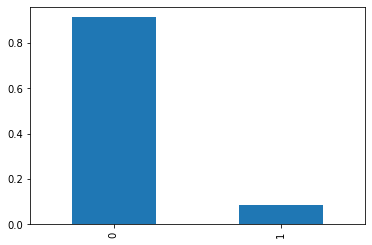

In [35]:
# Value counts of target variable

hvc_df['churn'].value_counts(normalize=True).plot.bar()

From the above plot we can say that there is class imbalance as 0 class is clearly dominating the 1 class.

Lets do the EDA by splitting the high value customers in to 2 data frames.

In [36]:
# splitting data frame in 2 data frames

hvc_df_0 = hvc_df[hvc_df['churn']==0]
hvc_df_1 = hvc_df[hvc_df['churn']==1]

In [37]:
# Method to plot Categorical variables using bar plot

def univariate_bar_plot(feature_name):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    hvc_df_0[feature_name].value_counts(normalize=True).plot.bar()
    plt.title('{} for Non Churners'.format(feature_name))
    plt.subplot(1,2,2)
    hvc_df_1[feature_name].value_counts(normalize=True).plot.bar()
    plt.title('{} for Churners'.format(feature_name))

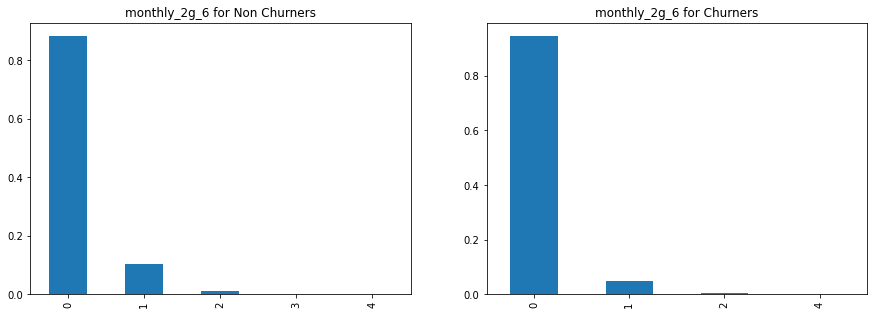

In [38]:
# Barplot of monthly_2g_6

univariate_bar_plot('monthly_2g_6')

From above plot we can see that most of the customers have not rechaged with 2G data pack. The other observation is none of the Churners rechrged with 2G pack with a validity of 3 months and there are negiligible amount of churners who have recharged with 2G pack with a validity of 1, 2 and 4 months. In Non churners also there are negligible amount of people who have rechaged with 2G pack with validity of 2, 3, and 4 months.

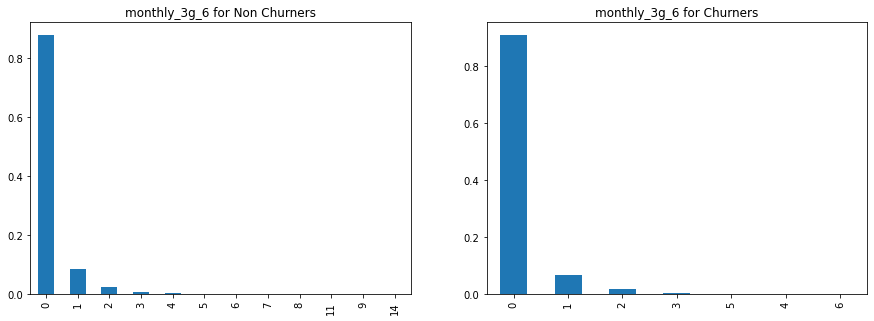

In [39]:
# Barplot of monthly_3g_6

univariate_bar_plot('monthly_3g_6')

From above plot we can see that most of the customers have not rechaged with 3G data pack. The other observation is none of the Churners rechrged with 3G pack with a validity beyond 6 months and there are negligible churners who have recharged with 3G pack with validity from 2 to 6 months. From non churners also there are negligible amount customers who have recharged with 3G data pack with validity beyond 1 month.

In [40]:
# Method to plot Categorical variables using Count plot

def univariate_count_plot(feature_name):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.countplot(hvc_df_0[feature_name])
    plt.title('{} for Non Churners'.format(feature_name))
    plt.subplot(1,2,2)
    sns.countplot(hvc_df_1[feature_name])
    plt.title('{} for Churners'.format(feature_name))

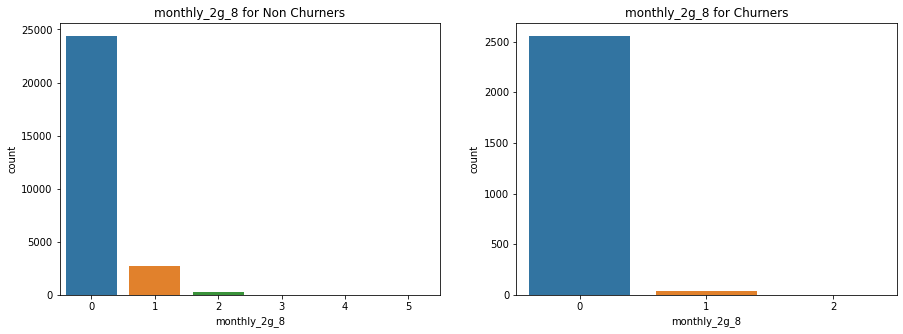

In [41]:
# count plot of monthly_2g_8

univariate_count_plot('monthly_2g_8')

From above plot we can see that most of the customers have not rechaged with 2G data pack. The other observation is none of the Churners rechrged with 2G pack with a validity beyond 2 months and there are negligible amount of people who recharged with 2G pack with a validity of 1 and 2 months. From Non churners also there are negligible amount of people who recharged with 2G with a validity of 2, 3, 4 and 5 months.

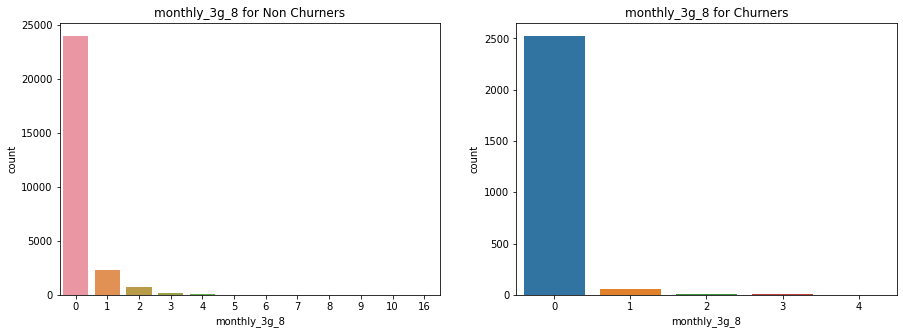

In [42]:
# count plot of monthly_3g_8

univariate_count_plot('monthly_3g_8')

From above plot we can see that most of the customers have not rechaged with 3G data pack. The other observation is none of the Churners rechrged with 3G pack with a validity beyond 4 months and there are negligible amount of people who recharged with 3G pack with a validity of 1, 2, 3 and 4 months from churners. From Non churners also there are negligible amount of people who recharged with 3G data pack with a validity of 2 or more months.

In [43]:
# Method to plot Continuous variables using box plot

def univariate_box_plot(feature_name):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(hvc_df_0[feature_name])
    plt.title('{} for Non Churners'.format(feature_name))
    plt.subplot(1,2,2)
    sns.boxplot(hvc_df_1[feature_name])
    plt.title('{} for Churners'.format(feature_name))

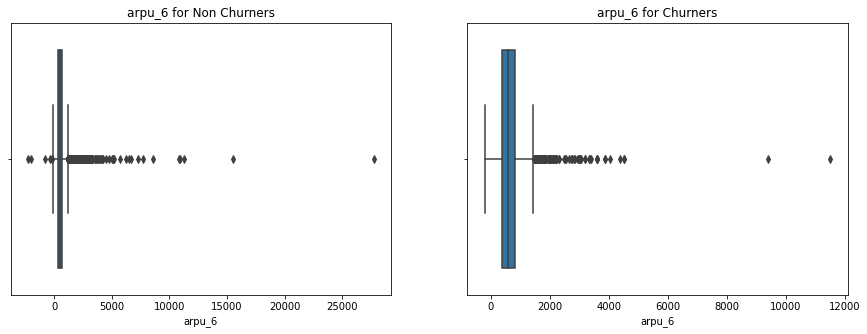

In [44]:
# box plot of arpu_6

univariate_box_plot('arpu_6')

From above plots, there are extreme values for both churners and non churners which indicates the presence of outliers.

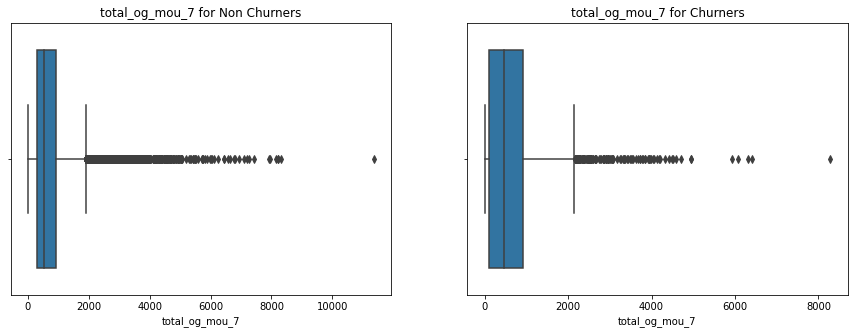

In [45]:
# box plot of total_og_mou_7

univariate_box_plot('total_og_mou_7')

From above plots, there are extreme values for both churners and non churners which indicates the presence of outliers.

In [46]:
# Method to plot Continuous variables using dist plot

def univariate_dist_plot(feature_name):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(hvc_df_0[feature_name].dropna())
    plt.title('{} for Non Churners'.format(feature_name))
    plt.subplot(1,2,2)
    sns.distplot(hvc_df_1[feature_name].dropna())
    plt.title('{} for Churners'.format(feature_name))

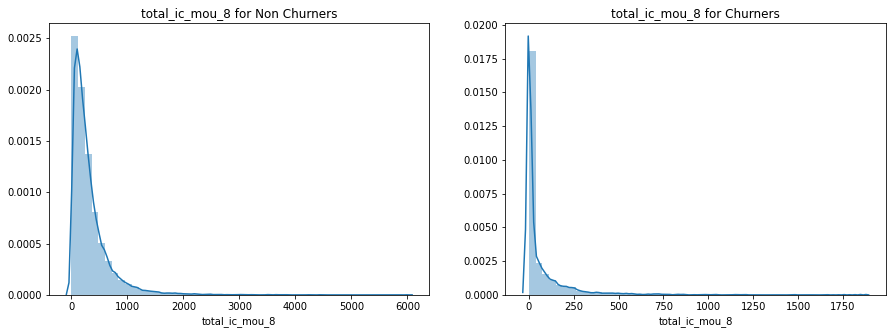

In [47]:
# distplot of total_ic_mou_8

univariate_dist_plot('total_ic_mou_8')

From above plots, there are long tails on the right side of the plot which confirms the presence if outliers.

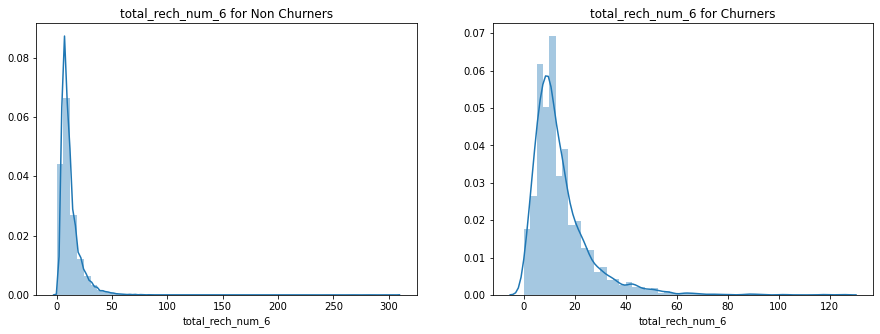

In [48]:
# distplot of total_rech_num_6

univariate_dist_plot('total_rech_num_6')

From above plots, there are long tails on the right side of the plot which confirms the presence if outliers. The maximum recharge amount in month 6 for churners is way less than non churners.

In [49]:
# Method to plot Categorical-Numerical variables using bar plot

def bivariate_bar_plot(feature_name1, feature_name2):
    hvc_df_0.groupby(feature_name1)[feature_name2].aggregate(['mean', 'median']).plot.bar()
    plt.ylabel('Mean and Median')
    plt.title('Non Churners')
    hvc_df_1.groupby(feature_name1)[feature_name2].aggregate(['mean', 'median']).plot.bar()
    plt.ylabel('Mean and Median')
    plt.title('Churners')

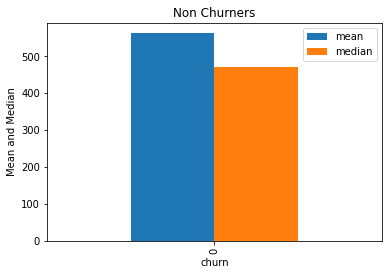

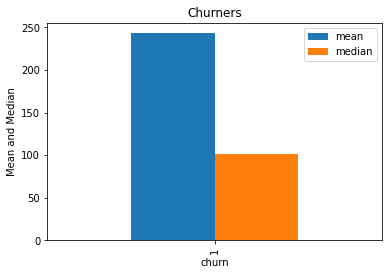

In [50]:
# bar plot of churn and arpu_8

bivariate_bar_plot('churn', 'arpu_8')

From above plot we can see that there is a significant difference between Mean and Median values of churners and non churners. This is because the users who are about churn are not satisfied with the services in action phase and hence ARPU for churners has significant downfall.

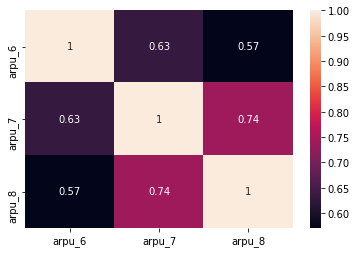

In [51]:
# heat map of arpu_6, arpu_7 and arpu_8

sns.heatmap(hvc_df[['arpu_6', 'arpu_7', 'arpu_8']].corr(), annot=True)

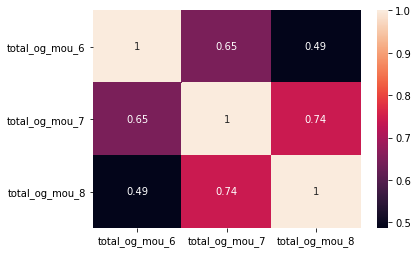

In [52]:
# heat map of total_og_mou_6, total_og_mou_7 and total_og_mou_8

sns.heatmap(hvc_df[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].corr(), annot=True)

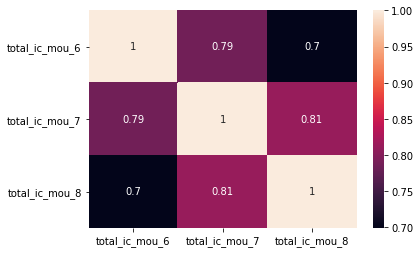

In [53]:
# heat map of total_ic_mou_6, total_ic_mou_7 and total_ic_mou_8

sns.heatmap(hvc_df[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']].corr(), annot=True)

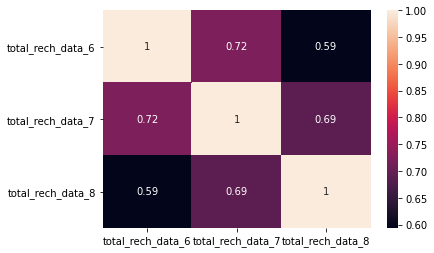

In [54]:
# heat map of total_rech_data_6, total_rech_data_7 and total_rech_data_8

sns.heatmap(hvc_df[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']].corr(), annot=True)

From the above heat maps, we can observe that there is multicillinearity between the variables of 6, 7 and 8th months of a parameter. This need to be taken care of if we are using a linear model like Logistic Regression.

In [55]:
# segregating categorical and numerical variables

hvc_cat_vars = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'churn']
hvc_cont_vars = [i for i in hvc_df.columns if i not in hvc_cat_vars]
print(len(hvc_cat_vars))
print(len(hvc_cont_vars))

7
134


``count_rech_2g_6`` variable data type is float. Data types of variables which indicates Number of time user has recharged cannot be of type float. Lets changes the data types.

In [56]:
# change data type

dtype_cols = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8']
hvc_df[dtype_cols] = hvc_df[dtype_cols].astype('int')
hvc_df[dtype_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   count_rech_2g_6  30011 non-null  int64
 1   count_rech_2g_7  30011 non-null  int64
 2   count_rech_2g_8  30011 non-null  int64
 3   count_rech_3g_6  30011 non-null  int64
 4   count_rech_3g_7  30011 non-null  int64
 5   count_rech_3g_8  30011 non-null  int64
dtypes: int64(6)
memory usage: 1.6 MB


#### Outlier Treatment

In [57]:
# method to cap outliers

def cap_outliers(col_name):
    Q1 = hvc_df[col_name].quantile(.25)
    Q3 = hvc_df[col_name].quantile(.75)
    IQR = Q3 - Q1
    UQ = Q3 + 1.5*(IQR)
    LQ = Q1 - 1.5*(IQR)
    hvc_df[col_name][hvc_df[col_name]>UQ] = UQ
    hvc_df[col_name][hvc_df[col_name]<LQ] = LQ   

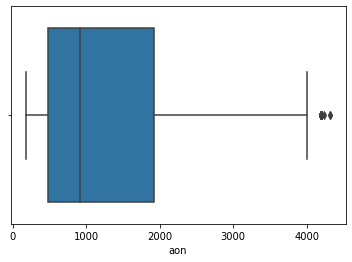

In [58]:
# before capping

sns.boxplot(hvc_df['aon'])

In [59]:
# capping outliers

for i in hvc_cont_vars:
    cap_outliers(i)

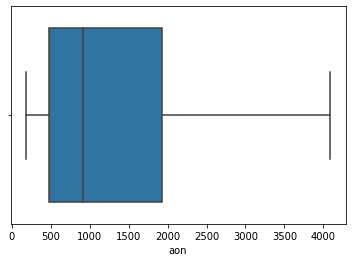

In [60]:
# after capping

sns.boxplot(hvc_df['aon'])

#### Create Dummies

In [61]:
# grouping insignificant levels of categorical variables. apart from 0 and 1 other level are insignificant

for i in hvc_cat_vars:
    if i != 'churn':
        hvc_df[i] = hvc_df[i].apply(lambda x : 'other' if x not in [0, 1] else x)

In [62]:
# shape before creating dummies

hvc_df.shape

(30011, 141)

In [63]:
# Method to create dummies, concat them to original data frame and drop original column

def create_dummies(var1):
    var2 = 'other'
    df = hvc_df
    dummies = pd.get_dummies(df[var1], prefix=var1)
    dummies.drop(columns=[var1+'_'+var2], inplace=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(columns=var1, inplace=True)
    return df

In [64]:
# create dummies

for i in hvc_cat_vars:
    if i != 'churn':
        hvc_df = create_dummies(i)

In [65]:
# shape after creating dummies

hvc_df.shape

(30011, 147)

#### Train test split and Scaling

In [66]:
# Splitting data in train and test

train, test = train_test_split(hvc_df, test_size = 0.2, random_state = 42)
print(train.shape)
print(test.shape)

(24008, 147)
(6003, 147)


In [67]:
# Scaling train data

scaler = MinMaxScaler()
train_scaled = train.copy()
train_scaled[hvc_cont_vars] = scaler.fit_transform(train_scaled[hvc_cont_vars])
train_scaled[hvc_cont_vars].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_rech_amt_good_phase,av_arpu_good,diff_arpu_good_action
count,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.0,24008.0,24008.0,24008.0,24008.0,24008.0,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.0,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.0,24008.0,24008.0,24008.000000,...,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.00000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.0,24008.0,24008.0,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.000000,24008.0,24008.000000,24008.0,24008.0,24008.0,24008.0,24008.0,24008.0,24008.0,24008.000000,24008.000000,24008.000000,24008.0,24008.000000,24008.000000,24008.000000
mean,0.517925,0.519680,0.517520,0.291694,0.291531,0.290377,0.341339,0.338201,0.316806,0.0,0.0,0.0,0.0,0.0,0.0,0.286816,0.290417,0.283830,0.290178,0.295379,0.286761,0.252112,0.253004,0.252654,0.0,0.247479,0.249384,0.294021,0.298346,0.290504,0.252445,0.251476,0.252783,0.259961,0.259314,0.260520,0.0,0.0,0.0,0.246177,...,0.445923,0.453216,0.374540,0.353933,0.325397,0.263119,0.247109,0.261496,0.260513,0.21152,0.218414,0.268006,0.165012,0.178241,0.183814,0.0,0.0,0.0,0.195201,0.206757,0.200725,0.246096,0.245529,0.245248,0.0,0.250959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277607,0.251548,0.250296,0.0,0.310362,0.526662,0.500687
std,0.205348,0.206474,0.207368,0.320463,0.323052,0.328802,0.283919,0.284776,0.286450,0.0,0.0,0.0,0.0,0.0,0.0,0.320104,0.320505,0.323614,0.294985,0.294020,0.298540,0.367189,0.366256,0.370130,0.0,0.427082,0.429915,0.289844,0.288289,0.294454,0.369472,0.369445,0.377839,0.349454,0.351228,0.359568,0.0,0.0,0.0,0.313447,...,0.257356,0.259020,0.253837,0.293229,0.286544,0.271450,0.355399,0.367629,0.364963,0.34270,0.347640,0.411864,0.306183,0.322453,0.325001,0.0,0.0,0.0,0.314325,0.321840,0.319091,0.410415,0.408348,0.411985,0.0,0.432868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249278,0.432585,0.431742,0.0,0.288153,0.199380,0.222545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.374685,0.3756

In [68]:
# scaling test data

test_scaled = test.copy()
test_scaled[hvc_cont_vars] = scaler.transform(test_scaled[hvc_cont_vars])
test_scaled[hvc_cont_vars].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_rech_amt_good_phase,av_arpu_good,diff_arpu_good_action
count,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.0,6003.0,6003.0,6003.0,6003.0,6003.0,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.0,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.0,6003.0,6003.0,6003.000000,...,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.0,6003.0,6003.0,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.0,6003.000000,6003.0,6003.0,6003.0,6003.0,6003.0,6003.0,6003.0,6003.000000,6003.000000,6003.000000,6003.0,6003.000000,6003.000000,6003.000000
mean,0.518107,0.517370,0.513030,0.293849,0.293274,0.291454,0.340256,0.336106,0.315001,0.0,0.0,0.0,0.0,0.0,0.0,0.286437,0.286624,0.281732,0.290428,0.297805,0.289219,0.252922,0.254906,0.247566,0.0,0.249235,0.240726,0.294222,0.298120,0.291600,0.255206,0.255967,0.254084,0.257393,0.254213,0.255987,0.0,0.0,0.0,0.245035,...,0.441728,0.445994,0.366450,0.347914,0.318316,0.261054,0.249075,0.260570,0.257405,0.209236,0.210558,0.261255,0.173180,0.185474,0.185840,0.0,0.0,0.0,0.192561,0.201874,0.194952,0.249027,0.244369,0.246124,0.0,0.245760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.275706,0.243510,0.247610,0.0,0.307093,0.525443,0.506650
std,0.204376,0.205407,0.206952,0.320085,0.321710,0.329464,0.279419,0.279632,0.283420,0.0,0.0,0.0,0.0,0.0,0.0,0.322247,0.319485,0.324204,0.294027,0.294809,0.301620,0.366484,0.366638,0.365742,0.0,0.427992,0.424820,0.290415,0.288629,0.297820,0.369907,0.370632,0.378298,0.348374,0.348493,0.357654,0.0,0.0,0.0,0.310561,...,0.254398,0.253616,0.250101,0.290646,0.280582,0.268903,0.356756,0.368697,0.365183,0.337560,0.340104,0.407184,0.313009,0.328034,0.327267,0.0,0.0,0.0,0.308073,0.319405,0.314502,0.411863,0.408743,0.412114,0.0,0.429917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249638,0.427724,0.429952,0.0,0.284063,0.196877,0.222136
min,0.000000,0.000000,0.055528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.376383,0.372990,0.371061,0.051509,0.051587,0.046508,0.126982,0.121776,0.088581,0.0,0.0,0.

In [69]:
# Create X and y

y_train = train_scaled.pop('churn')
train_scaled_X = train_scaled

In [70]:
# Inspecting X

train_scaled_X.shape

(24008, 146)

In [71]:
# Inspecting y

y_train.shape

(24008,)

### Model building using PCA and Random Forest

#### Model Training

In [72]:
# fit the data using PCA

pca = PCA(random_state=42)
pca.fit(train_scaled_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [73]:
# PCA components

pca.components_

array([[ 1.78814688e-02,  1.87539908e-02,  2.95740311e-02, ...,
         7.25614391e-02, -1.13424146e-01,  7.54654377e-02],
       [ 4.41409626e-02,  4.90959655e-02,  5.80076490e-02, ...,
        -4.34313783e-02,  5.97139388e-02, -3.73177220e-02],
       [ 7.21340057e-02,  1.06411789e-01,  1.08101672e-01, ...,
         3.41457721e-02, -6.07221448e-02,  3.64533557e-02],
       ...,
       [ 0.00000000e+00,  1.59520867e-18, -5.42591186e-19, ...,
        -1.25066876e-17, -4.80898953e-17, -2.77634658e-17],
       [-0.00000000e+00,  1.68920948e-18, -4.78029600e-18, ...,
         3.14237140e-17,  7.46904417e-17,  4.85026914e-17],
       [-0.00000000e+00,  2.25514052e-16, -3.02770273e-16, ...,
         1.45716772e-16,  1.59594560e-16,  1.31838984e-16]])

In [74]:
# explained variance ration of PCA

pca.explained_variance_ratio_

array([1.74556988e-01, 1.15618282e-01, 8.83727959e-02, 4.89974124e-02,
       4.29073048e-02, 3.98708251e-02, 3.03022150e-02, 2.91949231e-02,
       2.65644549e-02, 2.16842334e-02, 1.99373699e-02, 1.95797295e-02,
       1.78827095e-02, 1.66192978e-02, 1.63400209e-02, 1.57717597e-02,
       1.38724995e-02, 1.24518950e-02, 1.18142293e-02, 1.01145802e-02,
       1.00030394e-02, 9.77378643e-03, 9.40319508e-03, 9.01641915e-03,
       8.92192520e-03, 8.63204452e-03, 8.54989756e-03, 8.13734082e-03,
       7.44420204e-03, 7.29428191e-03, 6.37234583e-03, 6.07681994e-03,
       5.98947214e-03, 5.56196145e-03, 4.80920095e-03, 4.67286840e-03,
       4.64585634e-03, 4.35413489e-03, 4.29419292e-03, 4.19971765e-03,
       4.17610302e-03, 3.81730235e-03, 3.65358720e-03, 3.57581612e-03,
       3.53626508e-03, 3.39213675e-03, 3.22890536e-03, 3.16418429e-03,
       2.98860292e-03, 2.94974500e-03, 2.85333664e-03, 2.75749682e-03,
       2.54762041e-03, 2.49400725e-03, 2.43094455e-03, 2.23696713e-03,
      

Text(0, 0.5, 'Cumulative Variance Explained')

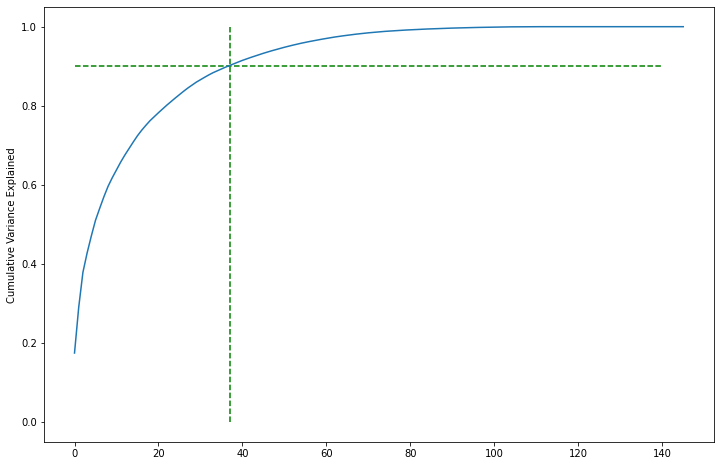

In [75]:
# cumulative variance explained chart

var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=[12,8])
plt.hlines(y=.9, xmax=140, xmin=0, colors='g', linestyles='--')
plt.vlines(x=37, ymax=1, ymin=0, colors='g', linestyles='--')
plt.plot(var_cumu)
plt.ylabel('Cumulative Variance Explained')

In [76]:
# transform x_train data

pca_final = PCA(n_components=37, random_state=42)
train_scaled_X_pca = pca_final.fit_transform(train_scaled_X)
train_scaled_X_pca.shape

(24008, 37)

In [77]:
# Initiating Random Forest model

rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42, verbose=1, class_weight='balanced')

In [78]:
# Hyper parameter tuning

params = {'n_estimators' : [5, 10, 15, 20],
          'max_depth' : [7, 10, 12, 15],
          'min_samples_leaf' : [5, 10, 15, 20],
          'max_leaf_nodes' : [5, 10, 15, 20]
          }

gs = GridSearchCV(estimator=rf,
                  param_grid=params,
                  scoring='accuracy',
                  n_jobs=-1,
                  cv=4,
                  verbose=1)

In [79]:
# fitting data to Grid search

%%time
gs.fit(train_scaled_X_pca, y_train)

Fitting 4 folds for each of 256 candidates, totalling 1024 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1024 out of 1024 | elapsed:  8.5min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


CPU times: user 8.73 s, sys: 597 ms, total: 9.32 s
Wall time: 8min 30s


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.1s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=42,
                               

In [80]:
# score of best extimator

gs.best_score_

0.8658363878707098

In [81]:
# Getting the best extimator

rf_best = gs.best_estimator_

In [82]:
# fit using best extimator

rf_best.fit(train_scaled_X_pca, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=1,
                       warm_start=False)

In [83]:
# create a data frame for analysing predictions on train data set

y_train_pred_rf = pd.DataFrame()
y_train_pred_rf['churn'] = y_train
y_train_pred_rf

,churn
99726,1
7168,0
47469,0
77101,0
37954,1
...,...
99268,0
17748,0
2817,0
52712,0


In [84]:
# predict on train data

y_train_pred_rf['churn_prob'] = rf_best.predict_proba(train_scaled_X_pca)[:,1]
y_train_pred_rf

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.0s finished


,churn,churn_prob
99726,1,0.759185
7168,0,0.247045
47469,0,0.546064
77101,0,0.261024
37954,1,0.515354
...,...,...
99268,0,0.330559
17748,0,0.278298
2817,0,0.350472
52712,0,0.211272


In [93]:
# Taking random cut off

y_train_pred_rf['predicted'] = y_train_pred_rf['churn_prob'].apply(lambda x : 1 if x >= 0.6 else 0)
y_train_pred_rf

,churn,churn_prob,predicted
99726,1,0.759185,1
7168,0,0.247045,0
47469,0,0.546064,0
77101,0,0.261024,0
37954,1,0.515354,0
...,...,...,...
99268,0,0.330559,0
17748,0,0.278298,0
2817,0,0.350472,0
52712,0,0.211272,0


In [94]:
# confusion matrix

confusion_matrix(y_train_pred_rf['churn'], y_train_pred_rf['predicted'])

array([[20470,  1472],
       [  747,  1319]])

In [95]:
# recall score

recall_score(y_train_pred_rf['churn'], y_train_pred_rf['predicted'])

0.638431752178122

In [96]:
# accuracy

accuracy_score(y_train_pred_rf['churn'], y_train_pred_rf['predicted'])

0.9075724758413862

Even though we have high accuracy, recall score is pretty low which means our model is below par in predicting actual converted as converted.

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.0s finished


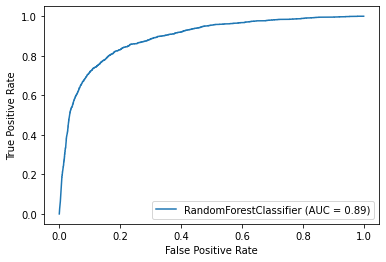

In [97]:
# plot roc curve

plot_roc_curve(rf_best, train_scaled_X_pca, y_train)

In [98]:
# Find optimal probalility cut off

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_rf[i]= y_train_pred_rf['churn_prob'].map(lambda x: 1 if x >= i else 0)
y_train_pred_rf.head()

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
99726,1,0.759185,1,1,1,1,1,1,1,1,1,0,0
7168,0,0.247045,0,1,1,1,0,0,0,0,0,0,0
47469,0,0.546064,0,1,1,1,1,1,1,0,0,0,0
77101,0,0.261024,0,1,1,1,0,0,0,0,0,0,0
37954,1,0.515354,0,1,1,1,1,1,1,0,0,0,0


In [99]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in numbers:
    cm1 = confusion_matrix(y_train_pred_rf['churn'], y_train_pred_rf[i] )
    accuracy = accuracy_score(y_train_pred_rf['churn'], y_train_pred_rf[i] )
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = recall_score(y_train_pred_rf['churn'], y_train_pred_rf[i] )
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086055  1.000000  0.000000
0.1   0.1  0.086055  1.000000  0.000000
0.2   0.2  0.181523  0.995644  0.104867
0.3   0.3  0.562271  0.948693  0.525886
0.4   0.4  0.771618  0.858664  0.763422
0.5   0.5  0.866794  0.743950  0.878361
0.6   0.6  0.907572  0.638432  0.932914
0.7   0.7  0.925816  0.514037  0.964588
0.8   0.8  0.922942  0.266215  0.984778
0.9   0.9  0.913945  0.000000  1.000000


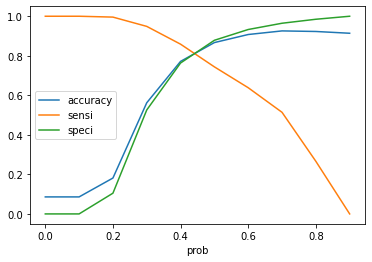

In [100]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From above plot, optimal probability cut off is around 0.44

In [101]:
# Reverify with 0.44 cut off probability

y_train_pred_rf['final_pred'] = y_train_pred_rf['churn_prob'].apply(lambda x : 1 if x >= 0.44 else 0)
y_train_pred_rf

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
99726,1,0.759185,1,1,1,1,1,1,1,1,1,0,0,1
7168,0,0.247045,0,1,1,1,0,0,0,0,0,0,0,0
47469,0,0.546064,0,1,1,1,1,1,1,0,0,0,0,1
77101,0,0.261024,0,1,1,1,0,0,0,0,0,0,0,0
37954,1,0.515354,0,1,1,1,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99268,0,0.330559,0,1,1,1,1,0,0,0,0,0,0,0
17748,0,0.278298,0,1,1,1,0,0,0,0,0,0,0,0
2817,0,0.350472,0,1,1,1,1,0,0,0,0,0,0,0
52712,0,0.211272,0,1,1,1,0,0,0,0,0,0,0,0


In [102]:
# recall score

recall_score(y_train_pred_rf['churn'], y_train_pred_rf['final_pred'])

0.8155856727976767

In [103]:
# accuracy score

accuracy_score(y_train_pred_rf['churn'], y_train_pred_rf['final_pred'])

0.8208930356547818

#### Making predictions on test data

In [104]:
# Create X and y

y_test = test_scaled.pop('churn')
test_scaled_X_pca = pca_final.transform(test_scaled)

In [105]:
# create a dataframe to analyse predictions on test data

y_test_pred_rf = pd.DataFrame()
y_test_pred_rf['churn'] = y_test

In [106]:
# predict on test data

y_test_pred_rf['churn_prob'] = rf_best.predict_proba(test_scaled_X_pca)[:,1]
y_test_pred_rf['final_pred'] = y_test_pred_rf['churn_prob'].apply(lambda x : 1 if x >= 0.44 else 0)
y_test_pred_rf

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.0s finished


,churn,churn_prob,final_pred
39713,0,0.248042,0
80955,1,0.860134,1
80034,0,0.325448,0
93911,0,0.180343,0
55461,0,0.258786,0
...,...,...,...
95082,0,0.215479,0
70926,0,0.227240,0
38178,0,0.352017,0
43121,0,0.325570,0


In [107]:
# recall score on test data

recall_score(y_test_pred_rf['churn'], y_test_pred_rf['final_pred'])

0.7741935483870968

In [108]:
# accuracy sore of test data

accuracy_score(y_test_pred_rf['churn'], y_test_pred_rf['final_pred'])

0.8132600366483425

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.0s finished


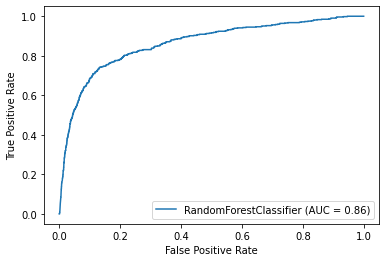

In [109]:
# roc curve of test data

plot_roc_curve(rf_best, test_scaled_X_pca, y_test)

### Model building using PCA and Decision Tree

#### Model training

In [110]:
# Initiating Decision tree model

dt_pca = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [111]:
# Hyper parameter tuning

params_dt = {'max_depth' : [2, 5, 7, 10, 12, 15, 17, 21, 25],
          'min_samples_leaf' : [2, 5, 10, 15, 20, 22, 25],
          'max_leaf_nodes' : [2, 5, 10, 15, 20, 25]
          }

gs_dt = GridSearchCV(estimator=dt_pca,
                  param_grid=params_dt,
                  scoring='accuracy',
                  n_jobs=-1,
                  cv=4,
                  verbose=1)

In [112]:
# fitting data to Grid search

%%time
gs_dt.fit(train_scaled_X_pca, y_train)

Fitting 4 folds for each of 378 candidates, totalling 1512 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1512 out of 1512 | elapsed:  7.3min finished


CPU times: user 9.2 s, sys: 819 ms, total: 10 s
Wall time: 7min 21s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_

In [113]:
# score of best extimator

gs_dt.best_score_

0.8094801732755748

In [114]:
# Getting the best extimator

dt_best_pca = gs_dt.best_estimator_

In [115]:
# fit using best extimator

dt_best_pca.fit(train_scaled_X_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [116]:
# create a data frame for analysing predictions on train data set

y_train_pred_dt = pd.DataFrame()
y_train_pred_dt['churn'] = y_train
y_train_pred_dt

,churn
99726,1
7168,0
47469,0
77101,0
37954,1
...,...
99268,0
17748,0
2817,0
52712,0


In [117]:
# predict on train data

y_train_pred_dt['churn_prob'] = dt_best_pca.predict_proba(train_scaled_X_pca)[:,1]
y_train_pred_dt

,churn,churn_prob
99726,1,0.645368
7168,0,0.232151
47469,0,0.832462
77101,0,0.295832
37954,1,0.645368
...,...,...
99268,0,0.295832
17748,0,0.645368
2817,0,0.645368
52712,0,0.238152


In [120]:
# Taking random cut off

y_train_pred_dt['predicted'] = y_train_pred_dt['churn_prob'].apply(lambda x : 1 if x > 0.7 else 0)
y_train_pred_dt

,churn,churn_prob,predicted
99726,1,0.645368,0
7168,0,0.232151,0
47469,0,0.832462,1
77101,0,0.295832,0
37954,1,0.645368,0
...,...,...,...
99268,0,0.295832,0
17748,0,0.645368,0
2817,0,0.645368,0
52712,0,0.238152,0


In [121]:
# confusion matrix

confusion_matrix(y_train_pred_dt['churn'], y_train_pred_dt['predicted'])

array([[19796,  2146],
       [ 1062,  1004]])

In [122]:
# recall score

recall_score(y_train_pred_dt['churn'], y_train_pred_dt['predicted'])

0.48596321393998065

In [123]:
# accuracy

accuracy_score(y_train_pred_dt['churn'], y_train_pred_dt['predicted'])

0.866377874041986

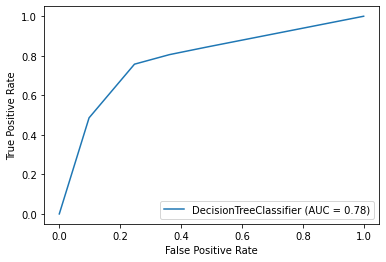

In [124]:
# plot roc curve

plot_roc_curve(dt_best_pca, train_scaled_X_pca, y_train)

In [125]:
# Find optimal probalility cut off

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_dt[i]= y_train_pred_dt['churn_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_dt.head()

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
99726,1,0.645368,0,1,1,1,1,1,1,1,0,0,0
7168,0,0.232151,0,1,1,1,0,0,0,0,0,0,0
47469,0,0.832462,1,1,1,1,1,1,1,1,1,1,0
77101,0,0.295832,0,1,1,1,0,0,0,0,0,0,0
37954,1,0.645368,0,1,1,1,1,1,1,1,0,0,0


In [126]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df_dt = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in numbers:
    cm1 = confusion_matrix(y_train_pred_dt['churn'], y_train_pred_dt[i] )
    accuracy = accuracy_score(y_train_pred_dt['churn'], y_train_pred_dt[i] )
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = recall_score(y_train_pred_dt['churn'], y_train_pred_dt[i] )
    cutoff_df_dt.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df_dt)

     prob  accuracy     sensi     speci
0.0   0.0  0.086055  1.000000  0.000000
0.1   0.1  0.086055  1.000000  0.000000
0.2   0.2  0.086055  1.000000  0.000000
0.3   0.3  0.753374  0.757502  0.752985
0.4   0.4  0.753374  0.757502  0.752985
0.5   0.5  0.753374  0.757502  0.752985
0.6   0.6  0.753374  0.757502  0.752985
0.7   0.7  0.866378  0.485963  0.902197
0.8   0.8  0.866378  0.485963  0.902197
0.9   0.9  0.913945  0.000000  1.000000


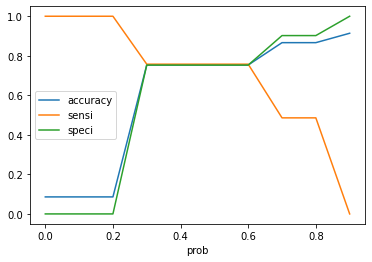

In [127]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df_dt.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [128]:
# Reverify with 0.45 cut off probability

y_train_pred_dt['final_pred'] = y_train_pred_dt['churn_prob'].apply(lambda x : 1 if x >= 0.45 else 0)
y_train_pred_dt

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
99726,1,0.645368,0,1,1,1,1,1,1,1,0,0,0,1
7168,0,0.232151,0,1,1,1,0,0,0,0,0,0,0,0
47469,0,0.832462,1,1,1,1,1,1,1,1,1,1,0,1
77101,0,0.295832,0,1,1,1,0,0,0,0,0,0,0,0
37954,1,0.645368,0,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99268,0,0.295832,0,1,1,1,0,0,0,0,0,0,0,0
17748,0,0.645368,0,1,1,1,1,1,1,1,0,0,0,1
2817,0,0.645368,0,1,1,1,1,1,1,1,0,0,0,1
52712,0,0.238152,0,1,1,1,0,0,0,0,0,0,0,0


In [129]:
# recall score

recall_score(y_train_pred_dt['churn'], y_train_pred_dt['final_pred'])

0.7575024201355276

In [130]:
# accuracy score

accuracy_score(y_train_pred_dt['churn'], y_train_pred_dt['final_pred'])

0.753373875374875

#### Making predictions on test data

In [131]:
# create a dataframe to analyse predictions on test data

y_test_pred_dt = pd.DataFrame()
y_test_pred_dt['churn'] = y_test

In [132]:
# predict on test data

y_test_pred_dt['churn_prob'] = dt_best_pca.predict_proba(test_scaled_X_pca)[:,1]
y_test_pred_dt['final_pred'] = y_test_pred_dt['churn_prob'].apply(lambda x : 1 if x >= 0.45 else 0)
y_test_pred_dt

,churn,churn_prob,final_pred
39713,0,0.238152,0
80955,1,0.832462,1
80034,0,0.232151,0
93911,0,0.232151,0
55461,0,0.232151,0
...,...,...,...
95082,0,0.832462,1
70926,0,0.232151,0
38178,0,0.645368,1
43121,0,0.295832,0


In [133]:
# recall scop on test data

recall_score(y_test_pred_dt['churn'], y_test_pred_dt['final_pred'])

0.7305502846299811

In [134]:
# accuracy sore of test data

accuracy_score(y_test_pred_dt['churn'], y_test_pred_dt['final_pred'])

0.7509578544061303

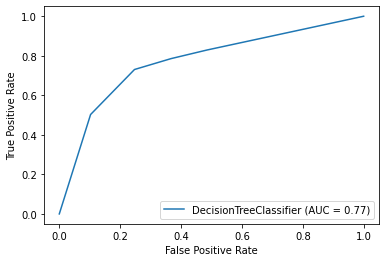

In [135]:
# roc curve of test data

plot_roc_curve(dt_best_pca, test_scaled_X_pca, y_test)

### Model building using PCA and Logistic Regression

#### Model Training

In [136]:
# Initiate Logistic Regression

logre_pca = LogisticRegression(class_weight='balanced', random_state=42)

In [137]:
# fit the data

logre_pca.fit(train_scaled_X_pca, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
# predict on train data

y_train_pred_logre = pd.DataFrame()
y_train_pred_logre['churn'] = y_train
y_train_pred_logre['churn_prob'] = logre_pca.predict_proba(train_scaled_X_pca)[:,1]
y_train_pred_logre

,churn,churn_prob
99726,1,0.927666
7168,0,0.162805
47469,0,0.732214
77101,0,0.226227
37954,1,0.544272
...,...,...
99268,0,0.071949
17748,0,0.004731
2817,0,0.268807
52712,0,0.023296


In [139]:
# Taking random cut off

y_train_pred_logre['predicted'] = y_train_pred_logre['churn_prob'].apply(lambda x : 1 if x >= 0.3 else 0)
y_train_pred_logre

,churn,churn_prob,predicted
99726,1,0.927666,1
7168,0,0.162805,0
47469,0,0.732214,1
77101,0,0.226227,0
37954,1,0.544272,1
...,...,...,...
99268,0,0.071949,0
17748,0,0.004731,0
2817,0,0.268807,0
52712,0,0.023296,0


In [140]:
# confusion matrix

confusion_matrix(y_train_pred_logre['churn'], y_train_pred_logre['predicted'])

array([[13866,  8076],
       [  196,  1870]])

In [141]:
# recall score

recall_score(y_train_pred_logre['churn'], y_train_pred_logre['predicted'])

0.9051306873184899

In [142]:
# accuracy

accuracy_score(y_train_pred_logre['churn'], y_train_pred_logre['predicted'])

0.6554481839386871

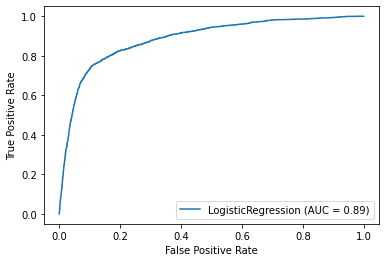

In [142]:
# plot roc curve

plot_roc_curve(logre_pca, train_scaled_X_pca, y_train)

In [143]:
# Find optimal probalility cut off

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_logre[i]= y_train_pred_logre['churn_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_logre.head()

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
99726,1,0.927666,1,1,1,1,1,1,1,1,1,1,1
7168,0,0.162805,0,1,1,0,0,0,0,0,0,0,0
47469,0,0.732214,1,1,1,1,1,1,1,1,1,0,0
77101,0,0.226227,0,1,1,1,0,0,0,0,0,0,0
37954,1,0.544272,1,1,1,1,1,1,1,0,0,0,0


In [144]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df_logre = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in numbers:
    cm1 = confusion_matrix(y_train_pred_logre['churn'], y_train_pred_logre[i] )
    accuracy = accuracy_score(y_train_pred_logre['churn'], y_train_pred_logre[i] )
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = recall_score(y_train_pred_logre['churn'], y_train_pred_logre[i] )
    cutoff_df_logre.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df_logre)

     prob  accuracy     sensi     speci
0.0   0.0  0.086055  1.000000  0.000000
0.1   0.1  0.379623  0.975799  0.323489
0.2   0.2  0.540695  0.942885  0.502826
0.3   0.3  0.655448  0.905131  0.631939
0.4   0.4  0.744960  0.856728  0.734436
0.5   0.5  0.815645  0.814618  0.815742
0.6   0.6  0.869169  0.760407  0.879409
0.7   0.7  0.898534  0.693611  0.917829
0.8   0.8  0.916736  0.557115  0.950597
0.9   0.9  0.921026  0.269119  0.982408


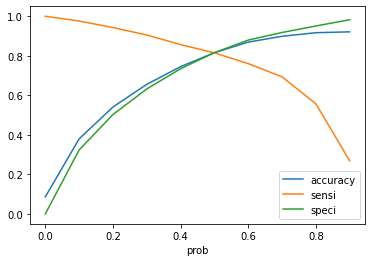

In [145]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df_logre.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From above plot optimal probability cut off is 0.5

In [146]:
# Reverify with 0.5 cut off probability

y_train_pred_logre['final_pred'] = y_train_pred_logre['churn_prob'].apply(lambda x : 1 if x >= 0.5 else 0)
y_train_pred_logre

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
99726,1,0.927666,1,1,1,1,1,1,1,1,1,1,1,1
7168,0,0.162805,0,1,1,0,0,0,0,0,0,0,0,0
47469,0,0.732214,1,1,1,1,1,1,1,1,1,0,0,1
77101,0,0.226227,0,1,1,1,0,0,0,0,0,0,0,0
37954,1,0.544272,1,1,1,1,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99268,0,0.071949,0,1,0,0,0,0,0,0,0,0,0,0
17748,0,0.004731,0,1,0,0,0,0,0,0,0,0,0,0
2817,0,0.268807,0,1,1,1,0,0,0,0,0,0,0,0
52712,0,0.023296,0,1,0,0,0,0,0,0,0,0,0,0


In [147]:
# recall score

recall_score(y_train_pred_logre['churn'], y_train_pred_logre['final_pred'])

0.8146176185866408

In [148]:
# accuracy score

accuracy_score(y_train_pred_logre['churn'], y_train_pred_logre['final_pred'])

0.8156447850716427

#### Making predictions on test data

In [149]:
# create a dataframe to analyse predictions on test data

y_test_pred_logre = pd.DataFrame()
y_test_pred_logre['churn'] = y_test
y_test_pred_logre['churn_prob'] = logre_pca.predict_proba(test_scaled_X_pca)[:,1]
y_test_pred_logre['final_pred'] = y_test_pred_logre['churn_prob'].apply(lambda x : 1 if x >= 0.5 else 0)
y_test_pred_logre

,churn,churn_prob,final_pred
39713,0,0.128200,0
80955,1,0.981168,1
80034,0,0.169943,0
93911,0,0.029390,0
55461,0,0.023150,0
...,...,...,...
95082,0,0.112528,0
70926,0,0.417363,0
38178,0,0.620186,1
43121,0,0.335546,0


In [150]:
# recall scop on test data

recall_score(y_test_pred_logre['churn'], y_test_pred_logre['final_pred'])

0.8140417457305503

In [151]:
# accuracy sore of test data

accuracy_score(y_test_pred_logre['churn'], y_test_pred_logre['final_pred'])

0.8127602865234049

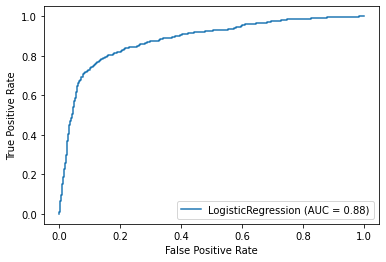

In [152]:
# roc curve of test data

plot_roc_curve(logre_pca, test_scaled_X_pca, y_test)

From above performance models, Logistic regression with PCA has high sensitivity. So we can use this model for making predictions.

### Model Building using Decision Tree for Interpritability

#### Model Training

In [153]:
# Initiating Decision tree model

dt_intpre = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [181]:
# Hyper parameter tuning

params_dt_interper = {
    "max_depth": [2,3,4,5,10],
    "min_samples_leaf": [5,10,20,50,100,500]
}

gs_dt_inter = GridSearchCV(estimator=dt_intpre,
                  param_grid=params_dt_interper,
                  scoring='accuracy',
                  n_jobs=-1,
                  cv=4,
                  verbose=1)

In [182]:
# fitting data to Grid search

%%time

train_dt = train.drop('churn',1)


gs_dt_inter.fit(train_dt, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   56.2s finished


CPU times: user 1.87 s, sys: 159 ms, total: 2.03 s
Wall time: 57 s


In [183]:
# score of best extimator

gs_dt_inter.best_score_

0.8760413195601466

In [184]:
# Getting the best extimator

dt_best_inter = gs_dt_inter.best_estimator_
dt_best_inter

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [185]:
# fit using best extimator

dt_best_inter.fit(train_dt, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [186]:
# create a data frame for analysing predictions on train data set

y_train_pred_dt_inter = pd.DataFrame()
y_train_pred_dt_inter['churn'] = y_train
y_train_pred_dt_inter

,churn
99726,1
7168,0
47469,0
77101,0
37954,1
...,...
99268,0
17748,0
2817,0
52712,0


In [187]:
# predict on train data

y_train_pred_dt_inter['churn_prob'] = dt_best_inter.predict_proba(train_dt)[:,1]
y_train_pred_dt_inter

,churn,churn_prob
99726,1,0.878302
7168,0,0.048469
47469,0,0.705307
77101,0,0.162289
37954,1,0.705307
...,...,...
99268,0,0.048469
17748,0,0.167689
2817,0,0.475911
52712,0,0.048469


In [188]:
# Taking random cut off

y_train_pred_dt_inter['predicted'] = y_train_pred_dt_inter['churn_prob'].apply(lambda x : 1 if x > 0.5 else 0)
y_train_pred_dt_inter

,churn,churn_prob,predicted
99726,1,0.878302,1
7168,0,0.048469,0
47469,0,0.705307,1
77101,0,0.162289,0
37954,1,0.705307,1
...,...,...,...
99268,0,0.048469,0
17748,0,0.167689,0
2817,0,0.475911,0
52712,0,0.048469,0


In [189]:
# confusion matrix

confusion_matrix(y_train_pred_dt_inter['churn'], y_train_pred_dt_inter['predicted'])

array([[19720,  2222],
       [  518,  1548]])

In [190]:
# recall score

recall_score(y_train_pred_dt_inter['churn'], y_train_pred_dt_inter['predicted'])

0.7492739593417231

In [191]:
# accuracy

accuracy_score(y_train_pred_dt_inter['churn'], y_train_pred_dt_inter['predicted'])

0.8858713762079307

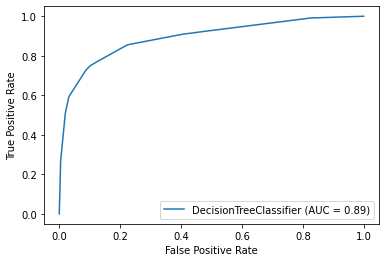

In [192]:
# plot roc curve

plot_roc_curve(dt_best_inter, train_dt, y_train)

In [193]:
# Find optimal probalility cut off

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_dt_inter[i]= y_train_pred_dt_inter['churn_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_dt_inter.head()

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
99726,1,0.878302,1,1,1,1,1,1,1,1,1,1,0
7168,0,0.048469,0,1,0,0,0,0,0,0,0,0,0
47469,0,0.705307,1,1,1,1,1,1,1,1,1,0,0
77101,0,0.162289,0,1,1,0,0,0,0,0,0,0,0
37954,1,0.705307,1,1,1,1,1,1,1,1,1,0,0


In [194]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df_dt_inter = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in numbers:
    cm1 = confusion_matrix(y_train_pred_dt_inter['churn'], y_train_pred_dt_inter[i] )
    accuracy = accuracy_score(y_train_pred_dt_inter['churn'], y_train_pred_dt_inter[i] )
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = recall_score(y_train_pred_dt_inter['churn'], y_train_pred_dt_inter[i] )
    cutoff_df_dt_inter.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df_dt_inter)

     prob  accuracy     sensi     speci
0.0   0.0  0.086055  1.000000  0.000000
0.1   0.1  0.241628  0.991288  0.171042
0.2   0.2  0.621918  0.909003  0.594887
0.3   0.3  0.782572  0.855276  0.775727
0.4   0.4  0.785072  0.853340  0.778644
0.5   0.5  0.885871  0.749274  0.898733
0.6   0.6  0.885871  0.749274  0.898733
0.7   0.7  0.899533  0.717328  0.916689
0.8   0.8  0.936188  0.593417  0.968462
0.9   0.9  0.939645  0.508228  0.980266


<Figure size 864x576 with 0 Axes>

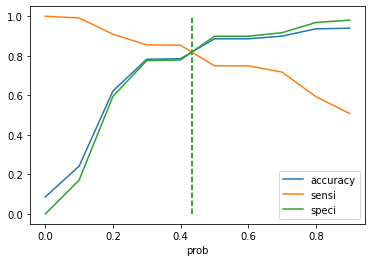

In [237]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=[12,8])
cutoff_df_dt_inter.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=.435, ymax=1, ymin=0, colors='g', linestyles='--')

In [238]:
# Reverify with 0.435 cut off probability

y_train_pred_dt_inter['final_pred'] = y_train_pred_dt_inter['churn_prob'].apply(lambda x : 1 if x >= 0.435 else 0)
y_train_pred_dt_inter

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
99726,1,0.878302,1,1,1,1,1,1,1,1,1,1,0,1
7168,0,0.048469,0,1,0,0,0,0,0,0,0,0,0,0
47469,0,0.705307,1,1,1,1,1,1,1,1,1,0,0,1
77101,0,0.162289,0,1,1,0,0,0,0,0,0,0,0,0
37954,1,0.705307,1,1,1,1,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99268,0,0.048469,0,1,0,0,0,0,0,0,0,0,0,0
17748,0,0.167689,0,1,1,0,0,0,0,0,0,0,0,0
2817,0,0.475911,0,1,1,1,1,1,0,0,0,0,0,1
52712,0,0.048469,0,1,0,0,0,0,0,0,0,0,0,0


In [239]:
# recall score

recall_score(y_train_pred_dt_inter['churn'], y_train_pred_dt_inter['final_pred'])

0.8533397870280736

In [240]:
# accuracy score

accuracy_score(y_train_pred_dt_inter['churn'], y_train_pred_dt_inter['final_pred'])

0.785071642785738

In [241]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

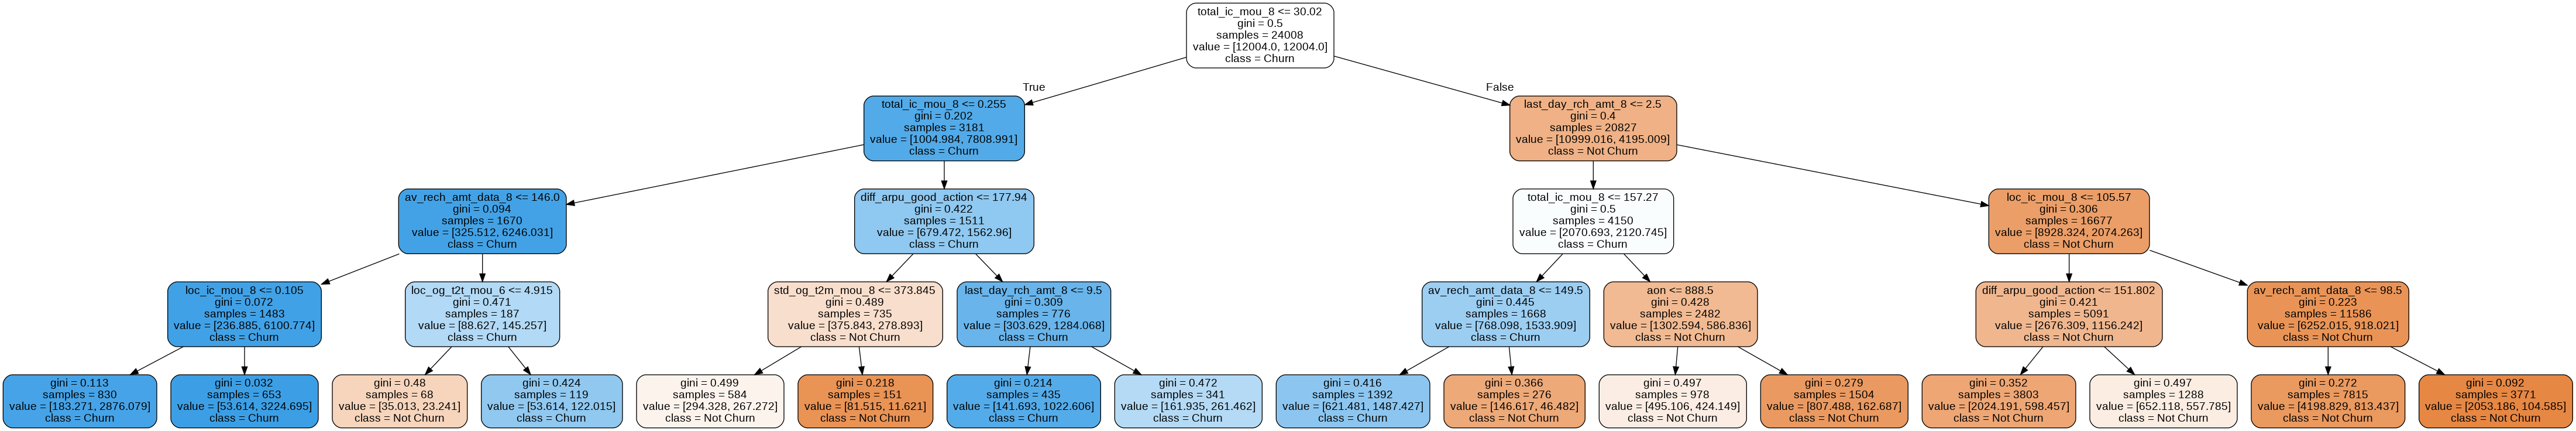

In [242]:
# plotting tree with best hyperparameters
dot_data = StringIO()  

export_graphviz(dt_best_inter, out_file=dot_data, filled=True, rounded=True,
                feature_names=train_dt.columns, 
                class_names=['Not Churn', "Churn"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Making predictions on test data

In [243]:
# create a dataframe to analyse predictions on test data

y_test_pred_dt_inter = pd.DataFrame()
y_test_pred_dt_inter['churn'] = y_test

In [245]:
# predict on test data
test_dt = test.drop('churn', 1)
y_test_pred_dt_inter['churn_prob'] = dt_best_inter.predict_proba(test_dt)[:,1]
y_test_pred_dt_inter['final_pred'] = y_test_pred_dt_inter['churn_prob'].apply(lambda x : 1 if x >= 0.435 else 0)
y_test_pred_dt_inter

,churn,churn_prob,final_pred
39713,0,0.048469,0
80955,1,0.940095,1
80034,0,0.228188,0
93911,0,0.461405,1
55461,0,0.461405,1
...,...,...,...
95082,0,0.162289,0
70926,0,0.162289,0
38178,0,0.461016,1
43121,0,0.167689,0


In [246]:
# recall scop on test data

recall_score(y_test_pred_dt_inter['churn'], y_test_pred_dt_inter['final_pred'])

0.8538899430740038

In [247]:
# accuracy sore of test data

accuracy_score(y_test_pred_dt_inter['churn'], y_test_pred_dt_inter['final_pred'])

0.7786106946526736

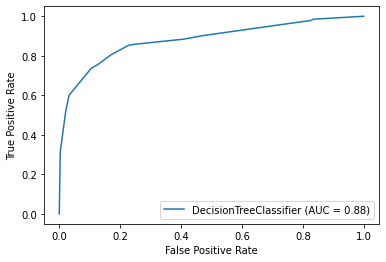

In [248]:
# roc curve of test data

plot_roc_curve(dt_best_inter, test_dt, y_test)

Interpretation -

total_ic_mou8 came out to be the most important feature.

Other important features are - last_day_rch_amt_8, diff_arpu_good_action, av_rech_amt_data_8, loc_ic_mou_8, aon

We could say - 

if total_ic_mou8  > 30.02 and last_day_rch_amount > 2.5, the customer would not churn

if total_ic_mou8  > 157.27 and last_day_rch_amount <=2.5, the customer would not churn

if 30.02 < total_ic_mou8  <= 157.27 and last_day_rch_amount <=2.5 and av_reach_amt_data_8 <=149.5, the customer would churn

if 30.02 < total_ic_mou8  <= 157.27 and last_day_rch_amount <=2.5 and av_reach_amt_data_8 > 149.5, the customer would not churn

if total_ic_mou8  <= .255 and diff_arpu_good_action <= 177.94, the customer would not churn but if diff_arpu_good_action  > 177.94, the customer would churn

if total_ic_mou8  <= .255 and av_reach_amt_data_8 <=146, the customer would churn

if total_ic_mou8  < .255 and av_reach_amt_data_8  >146 and loc_og_t2t_mou_6 > 4.915 would churn

if total_ic_mou8  < .255 and av_reach_amt_data_8  >146 and loc_og_t2t_mou_6 <= 4.915 would not churn

Service provide should offer additional benifits for the customers
1.   who are using the network only for incoming call in Action phase
2.   who are using the network less frequently to make the outgoing call in Action phase.
3. Provide additional data offers for customers av_rech_amt_data_8 <=146.

